# Manual Relation/Alignment Prototype in Jupyter NB
Purpose: Explore options for inputing relations

In [1]:
# %pip install ipympl
# %pip install pyqt5

In [2]:
import sys
import os


from PIL import Image as PILImage

from matplotlib import pyplot as plt

In [3]:
from os.path import abspath

In [4]:
%matplotlib qt5
img=PILImage.open(abspath(r"..\..\example\data\set_a\a_myimages01.jpg"))
# display(img)
plt.imshow(img)
plt.ginput(5)


[(903.396103896104, 383.91558441558436),
 (1033.2662337662339, 393.6558441558442),
 (1192.3571428571431, 335.2142857142858),
 (1185.8636363636365, 280.01948051948057),
 (916.383116883117, 773.525974025974)]

In [5]:
%matplotlib qt5
img0=PILImage.open(abspath(r"..\..\example\data\set_a\a_myimages01.jpg"))
img1=PILImage.open(abspath(r"..\..\example\data\set_a\a_myimages02.jpg"))

fig0, ax0 = plt.subplots()
ax0.imshow(img0)
plt.title("Figure 0")

fig1, ax1 = plt.subplots()
ax1.imshow(img1)
plt.title("Figure 1")
plt.show()

In [6]:
plt.autoscale(tight=True)
# select up to 3 points using left mouse
# stop collecting points with middle mouse
# undo previous with right click
border=ax0.plot([0,0,1600,1600,0],[0,1200,1200,0,0],"r--")
# plt.show()
fig0.draw(renderer=fig0.canvas.renderer)
plt.pause(0.05)
# plt.pause(5)
# fig0.show()
# fig0.canvas.flush_events()
fg0=fig0.ginput(3)
ax0.lines[0].remove()
fig0.draw(renderer=fig0.canvas.renderer)
plt.pause(0.05)

border=ax1.plot([0,0,1600,1600,0],[0,1200,1200,0,0],"r--")
# fig0.show()
# fig1.show()
# fig0.canvas.flush_events()
# fig1.canvas.flush_events()
# plt.show()
# plt.pause(5)
fig1.draw(renderer=fig0.canvas.renderer)
plt.pause(0.05)
fg1=fig1.ginput(3)
ax1.lines[0].remove()
fig1.draw(renderer=fig0.canvas.renderer)
plt.pause(0.05)
print(fg0,fg1)
# fig1.show()
plt.show()

[(925.0252840909093, 365.7889204545454), (1003.4670454545455, 543.1355113636364), (849.9940340909093, 624.9877840909091)] [(471.69128787878793, 410.0606060606059), (848.471590909091, 543.2329545454544), (806.2462121212122, 397.06818181818176)]


In [12]:
ax0.imshow(img1)
ax0.set_axis_off()
img2=PILImage.open(abspath(r"..\..\example\data\set_a\a_myimages03.jpg"))
ax1.imshow(img2)
ax1.set_axis_off()
plt.show()

# Single figure/axes

In [22]:
import numpy as np

In [10]:
%matplotlib qt5
img0=PILImage.open(abspath(r"..\..\example\data\set_a\a_myimages01.jpg"))
img1=PILImage.open(abspath(r"..\..\example\data\set_a\a_myimages02.jpg"))
print(img0.size)
print(img1.size)

(1600, 1200)
(1600, 1200)


In [43]:
plt.imshow(np.vstack([img0,img1]))
while (gput := plt.gcf().ginput(7)) != []:
    print(gput)
    for x,y in gput:
        format = "1r" if y<1200 else "1b"
        plt.plot([x],[y],format)
    plt.draw()
# Middle click to exit. right click to undo

# Integration with model

In [45]:
sys.path.insert(0, os.path.abspath("../.."))  # Repository directory relative to this file.
from MISalign.model.project import Project
from MISalign.model.relation import Relation
from MISalign.model.relation_service import relation_tree
from MISalign.model.image import Image

In [49]:
imgs=[Image(abspath(r"..\..\example\data\set_a\a_myimages01.jpg")),Image(abspath(r"..\..\example\data\set_a\a_myimages02.jpg"))]
# display(imgs[0].image)
# display(imgs[1]._img)

In [53]:
imgs[0]._img.shape

(1200, 1600, 3)

In [89]:
print(rd[1,:,0]) 
print(rel_data[1])

[676.12337662 851.44805195]
[(676.1233766233763, 302.0974025974026), (851.4480519480517, 678.7207792207794)]


In [93]:
plt.imshow(np.vstack([imgs[0]._img,imgs[1]._img]))
height=imgs[0]._img.shape[0]
rel_data=[[],[]]
while (align_pts := plt.gcf().ginput(7)) != []:
    print(align_pts)
    for x,y in align_pts:
        if y<height:
            rel_data[0].append((x,y))
        else:
            rel_data[1].append((x,y-height))
    try:
        rd=np.array(rel_data) #[a/b,pt,x/y]
        plt.plot(rd[0,:,0],rd[0,:,1],"or")
        plt.plot(rd[1,:,0],rd[1,:,1]+height,"og")
        plt.draw()
    except ValueError:
        print("Select a matching number of points in each image.")

rel=Relation(imgs[0].name,imgs[1].name,'p',rel_data)
print(rel.get_rel('p'))
print(rel.get_rel('r'))

[(708.5909090909088, 586.5129870129872), (1026.772727272727, 729.3701298701299), (741.0584415584412, 1456.6428571428573), (1052.746753246753, 1677.422077922078)]
[[(708.5909090909088, 586.5129870129872), (1026.772727272727, 729.3701298701299)], [(741.0584415584412, 256.64285714285734), (1052.746753246753, 477.42207792207796)]]
(314, 181)


In [102]:
imgs[0].size

(1600, 1200)

In [117]:
class InteractiveManualRelation():
    """Allows user to manually specify relation between two images using interactive matplotlib interface."""
    def __init__(self):
        self._fig=plt.figure()
        self._ax=self._fig.subplots()
        self.points=None
        plt.show()
    def plot_clear(self):
        """Clears current IMR figure"""
        self.points=None
    def plot_points(self):
        """Plots the points of the current relation"""
        for pop in self.points:
            plt.plot([pop[0][0],pop[1][0]],[pop[0][1],pop[1][1]+height],"x:")
        
        # for fmt,h,pts in zip(["r","b"],[0,self._height],self.points):
        #     for i,(x,y) in enumerate(pts):
        #         plt.plot(x,y+h,str(i+1)+fmt) #TODO convert this to use color rather than marker to indicate matching pairs.
    def change_images(self,imga:Image,imgb:Image):
        """Replaces image in IMR figure"""
        self._imga=imga
        self._imgb=imgb
        self._height=imga.size[1]
        self._ax=plt.imshow(np.vstack([imga._img,imgb._img]))
        self.points=None
    def manual(self):
        """Gets user input points from figure"""
        input_points=self._fig.ginput(7)
        rel_pts=[[],[]]
        for x,y in input_points:
            if y<self._height:
                rel_pts[0].append((x,y))
            else:
                rel_pts[1].append((x,y-self._height))
        if len(rel_pts[0]) == len(rel_pts[1]):
            self.points=[(a,b) for a,b in zip(rel_pts[0],rel_pts[1])]#convert from list of x,y sorted by image to pairs of x,y pairs
        else:
            raise ValueError("Mismatched number of selected points.")
    def get_rel(self):
        return Relation(self._imga.name,self._imgb.name,'p',self.points)
imr=InteractiveManualRelation()
imr.change_images(*imgs)
imr.manual()
print(imr.points)
imr.plot_points()
r=imr.get_rel()
print(r.get_rel())
print(r.get_rel('r'))


[((1330.1693306693305, 1143.9555444555442), (1342.9565434565434, 62.23726273726243)), ((1256.6428571428569, 1105.5939060939058), (1269.4300699300697, 14.28521478521452))]
('a_myimages01.jpg', 'a_myimages02.jpg')
(12, -1086)


# Testing separate module

In [1]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.alignment.interactive_manual import InteractiveManualRelation
from MISalign.model.image import Image
imgs=[Image(abspath(r"..\..\example\data\set_a\a_myimages01.jpg")),Image(abspath(r"..\..\example\data\set_a\a_myimages02.jpg"))]

In [2]:
%matplotlib qt5
imr=InteractiveManualRelation()
imr.change_images(*imgs)
imr.manual()
print(imr.points)
imr.plot_points()
r=imr.get_rel()
print(r.get_rel())
print(r.get_rel('r'))

[((1247.5519480519479, 1086.512987012987), (1254.045454545454, 48.85064935064952)), ((1331.9675324675322, 1157.9415584415585), (1305.9935064935062, 100.79870129870142))]
('a_myimages01.jpg', 'a_myimages02.jpg')
(-9, -1047)


In [4]:
imr2=InteractiveManualRelation()
imr2.change_images(*imgs)
imr2.points=r.get_rel('p')
imr.plot_points()

# swap between img pairs.

In [1]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.alignment.interactive_manual import InteractiveManualRelation
from MISalign.model.image import Image

In [2]:
imgs=[
    Image(abspath(r"..\..\example\data\set_a\a_myimages01.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages02.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages03.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages04.jpg")),
    ]

In [3]:
%matplotlib qt5
imr=InteractiveManualRelation()
imr.change_images(*imgs[0:2])
imr.manual()
imr.plot_points()
r=imr.get_rel()
print(r.get_rel())
print(r.get_rel('r'))

('a_myimages01.jpg', 'a_myimages02.jpg')
(25, -70)


In [4]:
imr.change_images(*imgs[1:3])
print(imr.points)

None


In [6]:
imr.manual()
imr.plot_points()
r=imr.get_rel()
print(r.get_rel())
print(r.get_rel('r'))

('a_myimages02.jpg', 'a_myimages03.jpg')
(-172, -27)


# Widget and subfigs

In [1]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.alignment.interactive_manual import InteractiveManualRelation
from MISalign.model.image import Image

from matplotlib import pyplot as plt
imgs=[
    Image(abspath(r"..\..\example\data\set_a\a_myimages01.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages02.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages03.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages04.jpg")),
    ]
%matplotlib qt5

In [2]:
fig=plt.figure()
subfigs = fig.subfigures(2,1,height_ratios=[0.9,0.1])

subfigs[0].suptitle("sf0")
subfigs[0].set_facecolor('green')
sfa1=subfigs[0].subplots(1,1)
sfa1.axis('off')
sfa1_im=sfa1.imshow(imgs[0]._img)

# subfigs[1].suptitle("sf1")
subfigs[1].set_facecolor('mediumblue')
sf1_ax=subfigs[1].subplots(1,5)
for ax in sf1_ax:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.show()

In [3]:
from matplotlib.widgets import Button


In [4]:
next_button=Button(sf1_ax[0],"Next Pair",color="gray",hovercolor="blue")
def next(a):
    print("next",a)
next_button.on_clicked(next)

0

In [5]:
ib=Button(sfa1,"")
def next(a):
    print("next",a)
ib.on_clicked(next)

0

next button_release_event: xy=(190, 157) xydata=(283.3854450085552, 956.9149392723906) button=1 dblclick=False inaxes=Axes(0.178272,0.11;0.668456x0.77)
next button_release_event: xy=(391, 246) xydata=(1035.117514235225, 624.0584509083428) button=1 dblclick=False inaxes=Axes(0.178272,0.11;0.668456x0.77)
next button_release_event: xy=(124, 24) xydata=(0.514516129032258, 0.5303357549577851) button=1 dblclick=False inaxes=Axes(0.125,0.11;0.133621x0.77)
next button_release_event: xy=(217, 215) xydata=(384.36437968079446, 739.9972277542471) button=1 dblclick=False inaxes=Axes(0.178272,0.11;0.668456x0.77)
next button_release_event: xy=(366, 261) xydata=(941.6185006498181, 567.9590427570988) button=1 dblclick=False inaxes=Axes(0.178272,0.11;0.668456x0.77)
next button_release_event: xy=(568, 416) xydata=(1154.8520819707867, 507.6192189105859) button=1 dblclick=False inaxes=Axes(0.125645,0.11;0.773711x0.77)


# sub fig approach

In [5]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.alignment.interactive_manual import InteractiveManualRelation
from MISalign.model.image import Image

import numpy as np
from matplotlib import pyplot as plt
imgs=[
    Image(abspath(r"..\..\example\data\set_a\a_myimages01.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages02.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages03.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages04.jpg")),
    ]
%matplotlib qt5

In [10]:
fig=plt.figure()

subfigs = fig.subfigures(2,1,height_ratios=[19,1])


subfigs[0].set_facecolor('green')
sf0ax0=subfigs[0].subplots(1,1)
sf0ax0_im=sf0ax0.imshow(np.vstack([imgs[0]._img,imgs[1]._img]))
sf0ax0.axis('off')

# subfigs[1].suptitle("sf1")
subfigs[1].set_facecolor('mediumblue')
sf1_ax=subfigs[1].subplots(1,5)
for ax in sf1_ax:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

fig.tight_layout()
plt.show()

# ipympl

In [1]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.alignment.interactive_manual import InteractiveManualRelation
from MISalign.model.image import Image

import numpy as np
from matplotlib import pyplot as plt
imgs=[
    Image(abspath(r"..\..\example\data\set_a\a_myimages01.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages02.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages03.jpg")),
    Image(abspath(r"..\..\example\data\set_a\a_myimages04.jpg")),
    ]
%matplotlib widget

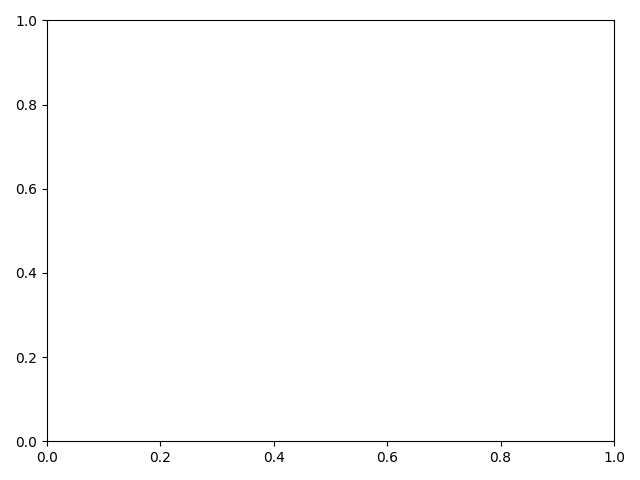

In [2]:
imr=InteractiveManualRelation()
imr.change(*imgs[0:2])
imr.relate()
# imr._fig.canvas.toolbar_visible = False
# imr._fig.canvas.header_visible = False
# imr._fig.canvas.footer_visible = False
# imr._fig.tight_layout()

In [3]:
imr.relate_resolve()
imr.plot_points()
imr.get_relation().get_rel("r")

(74, -224)